## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## Number of Datapoints

In [2]:
q=1500

## Data Collecting

In [3]:
dataset=pd.read_csv('wines.csv') 
dataset.quality.unique()
dataset['quality'].skew()

0.21769932922108254

#### Renaming the header of the CSV file

In [4]:
dataset = dataset.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid',
                         'residual sugar': 'residual_sugar', 'free sulfur dioxide': 'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'})
dataset.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


#### Wine Quality Categorizing

In [5]:
wine_table = []

for i in dataset.quality:
    if i <= 4:
        wine_table.append(0) #Table Wine
    elif i >= 7:
        wine_table.append(2) #Fine Wine
    else:
        wine_table.append(1) #Premium Wine     
dataset['label'] = wine_table
dataset.head()
        

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,1


## Dataset Spliting

In [6]:
x=dataset.iloc[1:q, 0: 11].values
y=dataset.iloc[1:q, -1].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [7]:
print(x)

[[ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 [11.2    0.28   0.56  ...  3.16   0.58   9.8  ]
 ...
 [ 6.9    0.74   0.03  ...  3.45   0.63  11.5  ]
 [ 6.6    0.895  0.04  ...  3.53   0.58  10.8  ]
 [ 6.9    0.74   0.03  ...  3.45   0.63  11.5  ]]


In [8]:
print(y)

[1 1 1 ... 1 1 1]


#### Data Standardzing 

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

## Building the ANN

In [10]:
ann=tf.keras.models.Sequential()

In [11]:
ann.add(tf.keras.layers.Dense(units=12,activation='relu'))

In [12]:
ann.add(tf.keras.layers.Dense(units=15,activation='relu'))

In [13]:
ann.add(tf.keras.layers.Dense(units=15,activation='relu'))

In [14]:
ann.add(tf.keras.layers.Dense(units=15,activation='relu'))

In [15]:
ann.add(tf.keras.layers.Dense(units=12,activation='relu'))

In [16]:
ann.add(tf.keras.layers.Dense(units=1,activation='relu'))

## Training the ANN

In [17]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
train=ann.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
38/38 [==============================] - 0s 1ms/step - loss: 1.0451 - accuracy: 0.2585
Epoch 2/100
38/38 [==============================] - 0s 1ms/step - loss: -1.4745 - accuracy: 0.7556
Epoch 3/100
38/38 [==============================] - 0s 1ms/step - loss: -1.5846 - accuracy: 0.8207
Epoch 4/100
38/38 [==============================] - 0s 1ms/step - loss: -1.5925 - accuracy: 0.8207
Epoch 5/100
38/38 [==============================] - 0s 1ms/step - loss: -1.5898 - accuracy: 0.8207
Epoch 6/100
38/38 [==============================] - 0s 1ms/step - loss: -1.5946 - accuracy: 0.8207
Epoch 7/100
38/38 [==============================] - 0s 1ms/step - loss: -1.5548 - accuracy: 0.8057
Epoch 8/100
38/38 [==============================] - 0s 1ms/step - loss: -1.5668 - accuracy: 0.8098
Epoch 9/100
38/38 [==============================] - 0s 1ms/step - loss: -1.5852 - accuracy: 0.8182
Epoch 10/100
38/38 [==============================] - 0s 1ms/step - loss: -1.6172 - accuracy: 0.8207


38/38 [==============================] - 0s 1ms/step - loss: -1.8124 - accuracy: 0.8207
Epoch 83/100
38/38 [==============================] - 0s 1ms/step - loss: -1.8125 - accuracy: 0.8207
Epoch 84/100
38/38 [==============================] - 0s 1ms/step - loss: -1.8127 - accuracy: 0.8207
Epoch 85/100
38/38 [==============================] - 0s 1ms/step - loss: -1.8129 - accuracy: 0.8207
Epoch 86/100
38/38 [==============================] - 0s 973us/step - loss: -1.8130 - accuracy: 0.8215
Epoch 87/100
38/38 [==============================] - 0s 1ms/step - loss: -1.8132 - accuracy: 0.8207
Epoch 88/100
38/38 [==============================] - 0s 1ms/step - loss: -1.8133 - accuracy: 0.8224
Epoch 89/100
38/38 [==============================] - 0s 1ms/step - loss: -1.8135 - accuracy: 0.8224
Epoch 90/100
38/38 [==============================] - 0s 1ms/step - loss: -1.8137 - accuracy: 0.8232
Epoch 91/100
38/38 [==============================] - 0s 2ms/step - loss: -1.8138 - accuracy: 0.8232
E

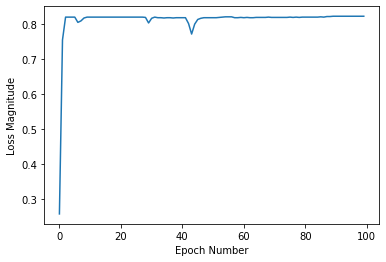

In [19]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(train.history['accuracy'])